In [5]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
import lightgbm as lgb

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

from scipy import stats

from sklearn.metrics import mean_squared_error, accuracy_score


pd.set_option('max_columns', 20)
pd.set_option('max_columns', None)


import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing


# pd.set_option('max_rows', 500)

In [3]:
df1 = pd.read_csv('../csv/cleaned_csv/dataClean_forPrice_20210719.csv', index_col=0, encoding='utf-8')

In [4]:
df1

,car_brand,car_model,car_year,car_mileage,car_price,source
0,TOYOTA,ALTIS,2009,197710,196000,HOT
1,MITSUBISHI,DELICA,2016,81609,358000,HOT
2,SUZUKI,CARRY,2013,53167,286000,HOT
3,NISSAN,MARCH,2013,92757,238000,HOT
4,NISSAN,SENTRA,2015,43307,378000,HOT
...,...,...,...,...,...,...
54145,HONDA,Civic,2007,280000,168000,8891
54146,TOYOTA,Sienta,2018,30000,398000,8891
54147,MERCEDES-BENZ,E-Class Sedan,2012,184000,720000,8891
54148,LUXGEN,S3,2019,23000,260000,8891


In [ ]:
df1.info()

In [ ]:
df1.describe()

In [ ]:
np.set_printoptions(threshold=len(df1['car_model'].unique()))
print(df1['car_model'].unique())
print(df1['car_brand'].unique())
print(len(df1['car_model'].unique()))
print(df1['car_brand'].unique())
print(len(df1['car_brand'].unique()))

In [5]:
df1.drop(columns=['source', 'car_model'], inplace=True)

In [6]:
df1.loc[df1['car_brand'].str.contains('BENZ') == True, 'car_brand'] = 'BENZ'

In [ ]:
df1.loc[df1['car_brand'].str.contains('BENZ') == True, 'car_brand']

In [7]:
df1.loc[df1['car_brand'].str.contains('VOLKSWAGEN') == True, 'car_brand'] = 'VW'

In [8]:
df1.drop(df1.loc[df1['car_price'] == 0].index , axis=0, inplace=True)

In [10]:
df1.loc[df1['car_price'] == 0]

,car_brand,car_year,car_mileage,car_price


In [9]:
df1.drop(df1.loc[df1['car_mileage'] == 0].index , axis=0, inplace=True)

In [11]:
df1.loc[df1['car_mileage'] == 0]

,car_brand,car_year,car_mileage,car_price


In [12]:
le = preprocessing.LabelEncoder()
le.fit(df1['car_brand'])
df1['car_brand'] = le.transform(df1['car_brand'])

In [ ]:
print(le.classes_)

In [ ]:
car_brand_dict = {k:v for v,k in enumerate(df1['car_brand'].unique())}

In [ ]:
print(car_brand_dict)

In [ ]:
df1['car_brand'] = df1['car_brand'].map(car_brand_dict)

In [13]:
df1['car_year'] = (2021 - df1['car_year'])

In [ ]:
df1

# remove outlier

In [14]:
df1['car_price'].describe()

count    4.835500e+04
mean     6.875934e+05
std      8.237647e+05
min      1.000000e+04
25%      2.780000e+05
50%      4.580000e+05
75%      8.480000e+05
max      1.000000e+08
Name: car_price, dtype: float64

In [15]:
df1['car_mileage'].describe()

count    4.835500e+04
mean     2.382396e+05
std      1.562337e+07
min      1.000000e+00
25%      5.000000e+04
50%      8.800000e+04
75%      1.300000e+05
max      2.147484e+09
Name: car_mileage, dtype: float64

In [ ]:
# df1[(np.abs(stats.zscore(df1['car_price'])) < 1.96) == False]

In [ ]:
df1[(stats.zscore(df1['car_price']) > 1.96) == False]

In [18]:
df1.drop(df1.loc[df1['car_price'] > 3000000].index , axis=0, inplace=True)

In [ ]:
# df1.drop(df1.loc[(np.abs(stats.zscore(df1['car_price'])) < 1.96) == False].index , axis=0, inplace=True)

In [20]:
df1.drop(df1.loc[df1['car_mileage'] > 300000].index , axis=0, inplace=True)

In [ ]:
df1[(stats.zscore(df1['car_mileage']) > 1.96) == False]

In [ ]:
# df1[(np.abs(stats.zscore(df1['car_mileage'])) < 1.96) == False]

In [ ]:
# df1.drop(df1.loc['' == False].index , axis=0 , inplace=True)

In [21]:
df1.shape

(47499, 4)

In [ ]:
# df1.drop(df1.loc[(np.abs(stats.zscore(df1['car_mileage'])) < 1.96) == False].index , axis=0 , inplace=True)

In [ ]:
# for i in ['car_year','car_mileage']:
#     sns.jointplot(x=i, y='car_price',data=df1[[i,'car_price']], height=7)

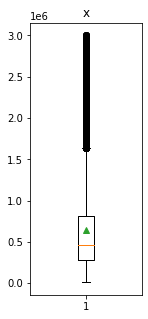

In [22]:
plt.figure(figsize=(2,5))
plt.boxplot(df1['car_price'],showmeans=True)
plt.title('x')
plt.show()

<AxesSubplot:xlabel='car_price'>

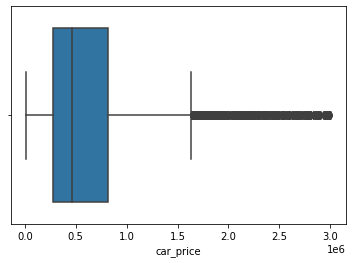

In [23]:
sns.boxplot(x=df1['car_price'])

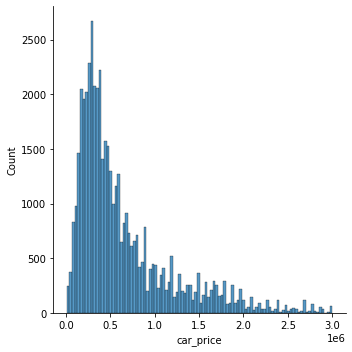

In [24]:
sns.displot(df1['car_price'])
plt.show()

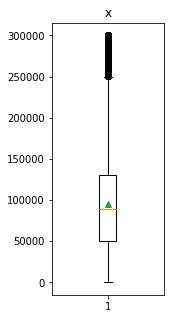

In [25]:
plt.figure(figsize=(2,5))
plt.boxplot(df1['car_mileage'],showmeans=True)
plt.title('x')
plt.show()

<AxesSubplot:xlabel='car_mileage'>

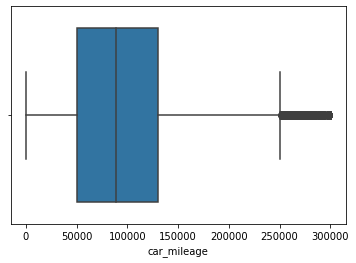

In [26]:
sns.boxplot(x=df1['car_mileage'])

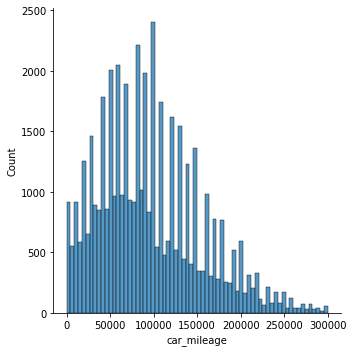

In [27]:
sns.displot(df1['car_mileage'])
plt.show()

In [ ]:
# print ("Shape Of The Before Ouliers: ",data.shape)
# n=1.5
# #IQR = Q3-Q1
# IQR = np.percentile(data['x'],75) - np.percentile(data['x'],25)
# #outlier = Q3 + n*IQR 
# data=data[data['x'] < np.percentile(data['x'],75)+n*IQR]
# #outlier = Q1 - n*IQR 
# data=data[data['x'] > np.percentile(data['x'],25)-n*IQR]
# print ("Shape Of The After Ouliers: ",data.shape)

In [30]:
X = df1.drop(['car_price'], axis = 1)
y = df1.loc[:,'car_price']

In [ ]:
# f, ax = plt.subplots(figsize=(11, 9))
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# sns.heatmap(X.corr(),cmap=cmap,square=True,annot=True)

In [31]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X

In [32]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

# Training

In [ ]:
	Model	r2_train	r2_test	d_train	d_test	rmse_train	rmse_test
8	LGBM	89.90	85.77	11.46	13.41	274,406.60	325,236.32
11	BaggingRegressor	96.82	84.97	5.42	12.62	154,048.31	334,278.98
7	XGB	87.70	84.66	12.95	14.19	302,861.88	337,698.16
6	Random Forest	96.75	84.62	5.50	12.75	155,706.68	338,065.90
12	ExtraTreesRegressor	99.31	84.48	0.96	11.85	71,730.49	339,694.29
9	GradientBoostingRegressor	77.28	77.13	18.23	18.07	411,657.37	412,264.28
5	Decision Tree Regressor	99.31	76.61	0.96	14.39	71,730.45	416,962.33
3	MLPRegressor	74.20	73.92	19.17	19.05	438,652.67	440,283.91
13	AdaBoostRegressor	62.49	62.34	25.49	25.27	528,888.33	529,050.27
0	Linear Regression	61.64	58.44	23.91	23.89	534,865.15	555,802.12
10	RidgeRegressor	61.64	58.44	23.91	23.89	534,865.19	555,793.60
14	VotingRegressor	59.23	58.33	24.99	24.88	551,429.32	556,535.26
4	Stochastic Gradient Decent	58.67	38.73	23.35	23.57	555,173.63	674,844.11
2	Linear SVR	43.94	35.56	27.61	27.69	646,616.92	692,091.67
1	Support Vector Machines	15.08	14.76	37.10	36.88	795,793.93	795,961.55

### LinearRegression & GradientBoost

In [33]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_y_preds = lin_model.predict(X_test)

In [34]:
lgb_model = lgb.LGBMRegressor(
    boosting_type='gbdt',
    num_leaves=31,
    reg_lambda=1.0
)

lgb_model.fit(X_train, y_train)
lgb_y_preds = lgb_model.predict(X_test)

In [35]:
lin_loss = mean_squared_error(y_test, lin_y_preds, squared=False)

lgb_loss = mean_squared_error(y_test, lgb_y_preds, squared=False)

In [36]:
print('Linear Regression RMSE：',lin_loss)
print('Gradient Boosted RMSE：', lgb_loss)

Linear Regression RMSE： 410271.80427013576
Gradient Boosted RMSE： 246935.8156261597


In [37]:
print('Linear Regression R*2：', lin_model.score(X_test, y_test))
print('Gradient Boosted R*2：', lgb_model.score(X_test, y_test))

Linear Regression R*2： 0.4409566929275397
Gradient Boosted R*2： 0.7974788992905328


### SVM

In [1]:
svr = SVR()
svr.fit(X_train, y_train)
print('DecisionTree R*2：', svr.score(X_test, y_test))

NameError: name 'SVR' is not defined

### ExtraTreesRegressor

In [ ]:
etr = ExtraTreesRegressor()
etr.fit(train, target)
acc_model(12,etr,train,test)

### DecisionTreeClassifier

In [38]:

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=0)
bag.fit(X_train, y_train)
print('DecisionTree R*2：', bag.score(X_test, y_test))

DecisionTree R*2： 0.11242105263157895


### RandomForestClassifier

In [ ]:
param_grid = { 
    'n_estimators': [100, 150, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(3,11),
    'criterion' :['gini', 'entropy']
}
RF = RandomForestClassifier()
gs1 = GridSearchCV(estimator=RF, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, verbose=3)
gs1.fit(X_train,y_train)


In [ ]:
print(gs1.best_params_)
print(gs1.best_score_)

In [39]:
RF1 = RandomForestClassifier(n_estimators=100, random_state=0)
RF1.fit(X_train, y_train)
print('RandomForest R*2：', RF1.score(X_test, y_test))

RandomForest R*2： 0.11389473684210526


### XgboostClassifier

In [ ]:
param={'n_estimators':[10,20,50,100,150,200],
 'max_depth':range(3,11),
 'eta':[0.05,0.1,0.15,0.2,0.25,0.3]}
xgr = xgb.XGBRegressor()
gs = GridSearchCV(estimator=xgr,param_grid=param,scoring='neg_root_mean_squared_error',cv=5,verbose=3)
gs.fit(X_train,y_train)

In [ ]:
print(gs.best_params_)
print(gs.best_score_)

In [40]:
xgr=xgb.XGBRegressor(eta=0.1,max_depth=5,n_estimators=150)
xgr.fit(X_train,y_train)
xgbpred=xgr.predict(X_test)
print('RMSE: ',mean_squared_error(y_test, xgbpred, squared=False))
print('R2Score: ',xgr.score(X_test, y_test))

RMSE:  243835.39461782394
R2Score:  0.8025325108686067


# Single car_brand training

In [ ]:
df2 = df1.loc[df1['car_brand'] == 62]

In [ ]:
X = df2.drop(['car_price','car_brand'], axis = 1)
y = df2.loc[:,'car_price']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_y_preds = lin_model.predict(X_test)

In [ ]:
lgb_model = lgb.LGBMRegressor(
    boosting_type='gbdt',
    num_leaves=31,
    reg_lambda=1.0
)

lgb_model.fit(X_train, y_train)
lgb_y_preds = lgb_model.predict(X_test)

In [ ]:
lin_loss = mean_squared_error(y_test, lin_y_preds, squared=False)
lgb_loss = mean_squared_error(y_test, lgb_y_preds, squared=False)

In [ ]:
print('Linear Regression RMSE：',lin_loss)
print('Gradient Boosted RMSE：', lgb_loss)

In [ ]:
print('Linear Regression R*2：', lin_model.score(X_test, y_test))
print('Gradient Boosted R*2：', lgb_model.score(X_test, y_test))

In [ ]:
param_grid = { 
    'n_estimators': [100, 150, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(3,11),
    'criterion' :['gini', 'entropy']
}
RF = RandomForestClassifier()
gs1 = GridSearchCV(estimator=RF, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, verbose=3)
gs1.fit(X_train,y_train)


In [ ]:
print(gs1.best_params_)
print(gs1.best_score_)

In [ ]:
rfc = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=7, criterion='gini')
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)
print('RMSE：', mean_squared_error(y_test, rfcpred, squared=False))
print('R2Score', rfc.score(X_test, y_test))
print("Accuracy for Random Forest on CV data: ", accuracy_score(y_test, rfcpred))

In [ ]:

param={'n_estimators':[10,20,50,100,150,200],
 'max_depth':range(3,11),
 'eta':[0.05,0.1,0.15,0.2,0.25,0.3]}
xgr = xgb.XGBRegressor()
gs = GridSearchCV(estimator=xgr,param_grid=param,scoring='neg_root_mean_squared_error',cv=5,verbose=3)
gs.fit(X_train,y_train)

In [ ]:
print(gs.best_params_)
print(gs.best_score_)

In [ ]:
xgr=xgb.XGBRegressor(eta=0.3,max_depth=3,n_estimators=20)
xgr.fit(X_train,y_train)
xgbpred=xgr.predict(X_test)
print('RMSE: ',mean_squared_error(y_test, xgbpred, squared=False))
print('R2Score: ',xgr.score(X_test, y_test))